In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [215]:
df = pd.read_csv('ds1_train.csv')

In [216]:
df.head()

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0


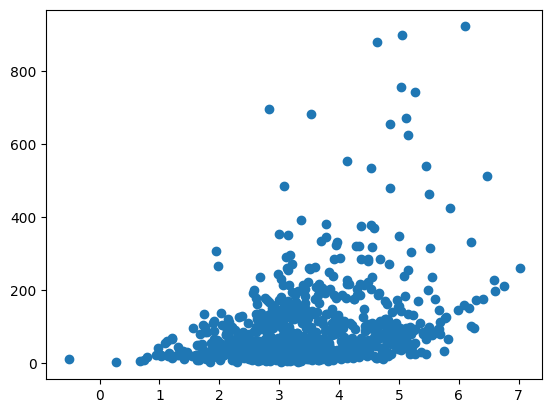

In [217]:
plt.scatter(df['x_1'],df['x_2'])

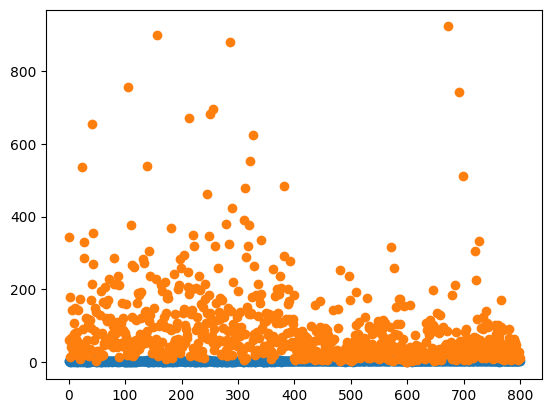

In [218]:
x = np.arange(len(df))
plt.scatter(x,y=df['x_1'])
plt.scatter(x,df['x_2'])

In [219]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

class logisticRegression:
    def __init__(self,lr=0.0001,n_iter=100,seed=42):
        self.w = None
        self.b = None
        self.lr = lr
        self.n_iter = n_iter
        np.random.seed(seed)


    def fit(self,X,y):
        assert(X.shape[0]==y.shape[0])
        n_samples,n_features = X.shape
        self.w = np.random.randn(n_features)
        self.b = 0.

        for _ in range(self.n_iter):
            Xx = X.copy()
            h_x = sigmoid(Xx@self.w+self.b)
            grad_w = (h_x-y)@Xx/n_samples
            grad_b = np.mean(h_x-y)
            self.w -= self.lr*grad_w
            self.b -= self.lr*grad_b
            loss = -np.mean(y * np.log(h_x + 1e-8) + (1 - y) * np.log(1 - h_x + 1e-8))
            print(loss)

    def predict(self,X):
        return sigmoid(X@self.w)


In [220]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

class logisticRegression2:
    def __init__(self, lr=0.0001, n_iter=100, seed=42):
        self.w = None
        self.b = None
        self.lr = lr
        self.n_iter = n_iter
        np.random.seed(seed)

    def fit(self, X, y):
        assert(X.shape[0] == y.shape[0])
        n_samples, n_features = X.shape
        self.w = np.random.randn(n_features)
        self.b = 0.

        for _ in range(self.n_iter):
            linear_model = X @ self.w + self.b
            h_x = sigmoid(linear_model)
            grad_w = (h_x - y) @ X / n_samples
            grad_b = np.mean(h_x - y)
            self.w -= self.lr * grad_w
            self.b -= self.lr * grad_b
            # Optionally print loss for debugging:
            loss = -np.mean(y * np.log(h_x + 1e-8) + (1 - y) * np.log(1 - h_x + 1e-8))
            print(loss)

    def predict(self, X):
        return sigmoid(X @ self.w + self.b)

In [221]:
from sklearn.linear_model import LogisticRegression as LR

In [222]:
logReg = logisticRegression()
X = np.stack((df['x_1'],df['x_2']),axis=1)
y = df['y']
print(X.shape,y.shape)
logReg.fit(X,y)

(800, 2) (800,)
2.488199908518609
2.4387824280362405
2.389210040556543
2.3394721941258
2.289555486193126
2.239448126444322
2.1891484411311954
2.1386730181598
2.0880583684191096
2.0373547675958714
1.986617572819062
1.9359022483218498
1.8852644246792272
1.8347617234158502
1.784453919916549
1.7344006010903112
1.6846575718693166
1.6352736886757315
1.5862879108974062
1.5377262620555383
1.4896039163327064
1.441939139639457
1.394774674324911
1.348188750818159
1.3022816103606432
1.2571448485910284
1.2128338763831827
1.1693588536274762
1.1267031956888165
1.08486827224451
1.0439182292183502
1.0039884096976273
0.9652500718237371
0.9278647336283659
0.8919616366323859
0.8576381629674432
0.8249673481494879
0.7940026352425952
0.764776822374114
0.737295245714808
0.7115295836455625
0.6874329962152013
0.6649878834831333
0.6442318743403512
0.6252183597555979
0.6079706649702261
0.5924712566276135
0.5786679886683866
0.5664797055291294
0.5557980795744655
0.5464900688129176
0.5384096490039751
0.5314216332927

In [223]:
y_pred = logReg.predict(X)
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

In [224]:
acc = (y==y_pred).mean()

In [225]:
acc

np.float64(0.75875)

In [226]:
df_val = pd.read_csv('ds1_valid.csv')
X_val = np.stack((df_val['x_1'],df_val['x_2']),axis=1)
y_val = df_val['y']


In [227]:
y_pred_val = logReg.predict(X_val)
threshold = 0.5
y_pred_val = (y_pred_val >= threshold).astype(int)
acc_val =  (y_pred_val==y_val).mean()
acc_val

np.float64(0.72)